# Project: Determining Factors for Missed Medical Appointments

### By Michael Padden

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> For this project, I will be analyzing data looking at medical appointments in Brazil. I am focused on the dependent variable, whether the patient attended the appointment or not. There are many independent variables as well, including age, gender, and date of the appointment. To figure out what factors lead to missed medical appointments, I have split the analysis up to a few sections. First, I will come up with questions about the dataset to base my analysis. Second, I will wrangle the data to make sure that it is clean and readable. Third, I will explore the data, through graphs and tables. Hopefully in this step there will be clear findings about why someone may be a no-show at their appointment. Lastly, I will conclude the analysis process by summarizing and communicating my results.

### Question 1:
> Is the age or gender of the patient a determining factor for whether they will be a no-show?

>> I anticipate that age will be a determining factor. I think that younger patients will be more likely to not show up to their appointment, particularly people are under 18 years old because they are largely dependent on other people. I do not think gender will have an effect on whether a patient is a no-show.

### Question 2: 
> Does the amount of time between when the appointment was scheduled and when the appointment actually is effect whether the appointment is attended?

>> I anticipate that the longer an appointment is scheduled from the actual time of the appointment will relate with no show appointments. If the appointment was scheduled in under a week, I anticipate that they will be more likely to show up.

### Question 3:
> Are weekday appointments more likely to be missed than weekend appointments? Does it matter if the appointment is early in the week or late in the week?

>>I predict that the weekends will have more no show appointments than weekdays. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

> In this section of my report, I will load in the data, check for cleanliness, and based on my initial findings, I will trim and clean my dataset for analysis. 

## Data Load and Check

In [2]:
# Loaded my data and printed out a few lines
df= pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#After looking at the first few lines, inspected data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Check for duplicates
df.duplicated().sum()

0

## Initial Findings
> I found that the dependent variable 'No-show' is a string and needs to be put into binary form. I also found that 'ScheduledDay' and 'AppointmentDay' are strings not dates that need to be fixed. I also noticed that there are no 'null' values in the data set and there are no duplicated rows, so I do not need to replace these values. 

## Data Cleaning

In [5]:
#First Delete appointment ID
df.drop(['AppointmentID'], axis=1,inplace = True)
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [6]:
#Rename no show to Attended and change 'Yes' to 0 and 'No' to 1
df.rename(columns={'No-show':'Attended'}, inplace=True)

In [7]:
#check the value counts
df.Attended.value_counts()

No     88208
Yes    22319
Name: Attended, dtype: int64

In [8]:
#map No to 1 and Yes to 0 and double check that mapping worked by comparing value counts
df['Attended'] = df['Attended'].map({'No': 1, 'Yes': 0})
df.Attended.value_counts()

1    88208
0    22319
Name: Attended, dtype: int64

In [9]:
#Change data type to date for scheduled and appointment day
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Attended          110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(8), object(2)
memory usage: 11.0+ MB


In [10]:
#Make sure the dates dont account for time as appointment day does not have a time aspect to it
df['ScheduledDay']=df['ScheduledDay'].values.astype('<M8[D]')
df['AppointmentDay']=df['AppointmentDay'].values.astype('<M8[D]')

In [11]:
#Create a new feature that is the difference from when the appointment was scheduled to when it actually was
df['day_difference']=(df.AppointmentDay-df.ScheduledDay).dt.days

In [12]:
#Create a new feature that is the day of the week the appointment is 
df['day_of_week']=df.AppointmentDay.dt.weekday_name

In [13]:
#Check new features in head of dataframe 
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attended,day_difference,day_of_week
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday


In [14]:
#Double check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Attended          110527 non-null int64
day_difference    110527 non-null int64
day_of_week       110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 12.6+ MB


In [15]:
#Make sure the column names are all lower case and without spaces for ease
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attended,day_difference,day_of_week
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday


### Filter the Data
> Now that I have cleaned the dataframe, I am going to filter my data based on outliers or bad data. The questions I am addressing relate to the independent variables age, gender, day_difference, and day_of_week. In the gender and day of week variables, there are no outliers. 

> In age, there are some negative values and some extremely high values (>100). There also is an extremely high number of age 0 patients. I felt that this is due to missing data or unnecessary  outliers, and decided to filter the ages to between 0-100.

> In day_difference, there are some cases where the scheduled date was after the appointment date which does not make sense so I filtered that out of the data as well.

In [16]:
#Filter
df_filter=df.query('age>0&age<100')
df_filter=df_filter.query('day_difference>=0')
df_filter.shape

(106971, 15)

<a id='eda'></a>
# Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Is the age or gender of the patient a determining factor for whether they will be a no-show?


#### Age

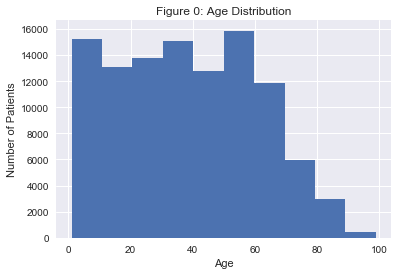

In [58]:
#Start with a histogram of age to look at the age distribution
graph_0=df_filter.age.hist()
graph_0.set_title("Figure 0: Age Distribution")
graph_0.set_xlabel("Age")
graph_0.set_ylabel("Number of Patients");

The age of patients is pretty evenly distributed from 0-60 years old. It dramatically drops after that.

In [18]:
#Now lets look at the average age of people who attended their appointment vs average age of people who were no-shows
sample = df_filter.groupby('attended')['age'].mean()
agenotattended=sample[0]
ageattended=sample[1]

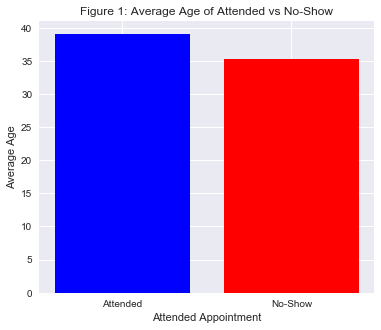

In [19]:
plt.figure(figsize=(6,5))
plt.bar(df_filter.attended.unique(),[agenotattended,ageattended],tick_label=['No-Show','Attended'],color=['red', 'blue'])
plt.title('Figure 1: Average Age of Attended vs No-Show')
plt.xlabel('Attended Appointment')
plt.ylabel('Average Age');

Figure 1: Shows the average age for attended appointments and no-show appointments. This figure shows that younger people are more likely to miss thier appointment.

In [20]:
#Now lets split up patients into 4 ages groups and graph each age groups attendance
df_filter.age.describe()

count    106971.000000
mean         38.309233
std          22.456204
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          99.000000
Name: age, dtype: float64

In [21]:
#Split into 4 age groups
bin_edges = [1, 18, 40, 65, 99]
bin_names = ['Under 18', '18-40', '40-65', 'Over 65']
df_filter['age_groups'] = pd.cut(df_filter['age'], bin_edges, labels=bin_names)

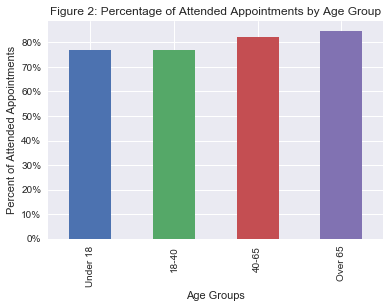

In [22]:
#Graph the 4 age groups 
seq=['0%','10%','20%','30%','40%','50%','60%','70%','80%']
graph2=df_filter.groupby('age_groups')['attended'].mean()
graph_2=graph2.plot(kind='bar',title='Figure 2: Percentage of Attended Appointments by Age Group')
graph_2.set_xlabel("Age Groups")
graph_2.set_ylabel("Percent of Attended Appointments")
graph_2.set_yticklabels(seq);

Figure 2: Shows each age group and the percentage of people in that group that attended their appointment. It confirms that younger people are more likely to miss appointments. It also shows that despite being dependent on a guardian, the under 18 group are almost equally as likely to miss as the 18-40 group. 

#### Gender

In [23]:
#Now lets look at similarities between gender and age
df_filter.gender.value_counts()

F    70106
M    36865
Name: gender, dtype: int64

In [24]:
df_filter.groupby('gender')['attended'].mean()

gender
F    0.796465
M    0.799186
Name: attended, dtype: float64

Men and women are about equally likely to attend from initial comparison

In [25]:
#Now lets graph men and women by age group and see if this initial comparison holds true
gender_age= df_filter.groupby(['gender','age_groups'])['attended'].mean()
f_age=gender_age[:4]
m_age=gender_age[4:]


In [26]:
ind = np.arange(len(m_age))
width = 0.35 


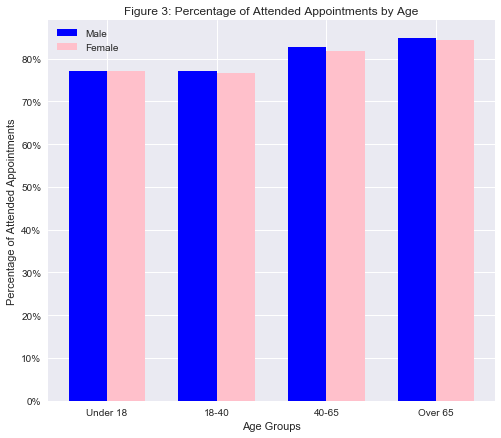

In [27]:
# plot bars
plt.figure(figsize=(8,7))
blue_bars = plt.bar(ind, m_age, width, color='blue', alpha=1, label='Male')
red_bars = plt.bar(ind + width, f_age, width, color='pink', alpha=1, label='Female')

# title and labels
plt.ylabel('Percentage of Attended Appointments')
plt.xlabel('Age Groups')
plt.title('Figure 3: Percentage of Attended Appointments by Age')
locations = ind + width / 2  # xtick locations
labels = ['Under 18', '18-40', '40-65', 'Over 65']  # xtick labels
plt.xticks(locations, labels)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],seq)

# legend
plt.legend(loc=2);

Figure 3: Shows that men are more likely to attend their appointment than women are. The only exception is when a patient is under 18 years old, male and female are equally as likely.

### Research Question 2: Does the amount of time between when the appointment was scheduled and when the appointment actually is effect whether the appointment is attended?


#### Day_Difference

In [29]:
#Lets look at the distribution and put the time between scheduling and appointment into bins
df_filter.day_difference.describe()

count    106971.000000
mean         10.167363
std          15.263905
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: day_difference, dtype: float64

In [30]:
#Split into 4 age groups
bin_edges = (-1, .5, 7, 21, 180)
bin_names = ['Same Day', 'Within 1 Week', '1-3 Weeks', 'Over 3 Weeks']
df_filter['time_until_app_groups'] = pd.cut(df_filter['day_difference'], bin_edges, labels=bin_names)
df_filter.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attended,day_difference,day_of_week,age_groups,time_until_app_groups
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,40-65,Same Day


In [31]:
#Check out the percentage of attended appointments for each time range
df_filter.groupby('time_until_app_groups')['attended'].mean()

time_until_app_groups
Same Day         0.953138
Within 1 Week    0.758882
1-3 Weeks        0.687120
Over 3 Weeks     0.668264
Name: attended, dtype: float64

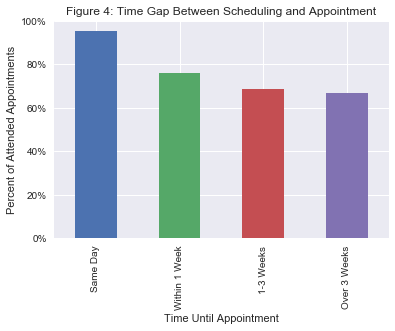

In [33]:
#Graph
seq4=['0%','20%','40%','60%','80%','100%']
graph4=df_filter.groupby('time_until_app_groups')['attended'].mean()
graph_4=graph4.plot(kind='bar',title='Figure 4: Time Gap Between Scheduling and Appointment')
graph_4.set_xlabel("Time Until Appointment")
graph_4.set_ylabel("Percent of Attended Appointments")
graph_4.set_yticklabels(seq4);

Figure 4: Shows that same day appointments are almost always attended. Appointments made under 1 week ago, are attended at a high rate, and appointments over 1 week are attended at a worse rate. 

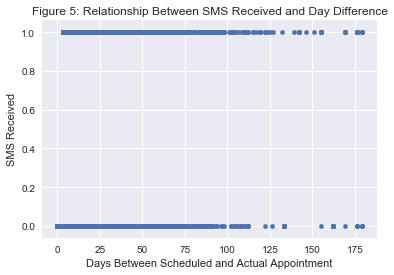

In [43]:
#To analyze day_difference further we can look at the scatter plot of day_difference compared to sms_received
graph_5=df_filter.plot(x='day_difference', y='sms_received', kind='scatter', title='Figure 5: Relationship Between SMS Received and Day Difference')
graph_5.set_xlabel("Days Between Scheduled and Actual Appointment")
graph_5.set_ylabel("SMS Received");

Figure 5: Shows the relationship between the days between scheduled and actual appointment and whether a SMS text was received. It shows that there is a positive relationship between the two variables.

### Research Question 3: Are weekday appointments more likely to be missed than weekend appointments? Does it matter if the appointment is early in the week or late in the week?

#### Day_of_Week

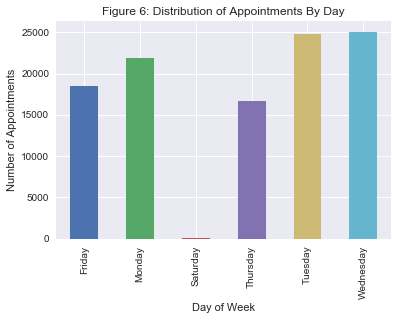

In [50]:
#Look at the distribution of how many appointments are on each day
graph_6=df_filter.groupby('day_of_week')['attended'].count().plot(kind='bar', title='Figure 6: Distribution of Appointments By Day')
graph_6.set_xlabel("Day of Week")
graph_6.set_ylabel("Number of Appointments");

Figure 6: Shows that there are very few appointments on the weekend compared to weekdays

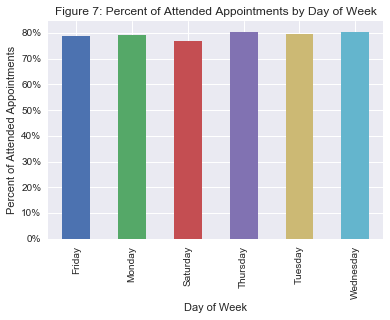

In [52]:
#Graph the percent of appointments attended by day of week
seq7=['0%','10%','20%','30%','40%','50%','60%','70%','80%']
graph7=df_filter.groupby('day_of_week')['attended'].mean()
graph_7=graph7.plot(kind='bar',title='Figure 7: Percent of Attended Appointments by Day of Week')
graph_7.set_xlabel("Day of Week")
graph_7.set_ylabel("Percent of Attended Appointments")
graph_7.set_yticklabels(seq7);

Figure 7: Shows that Saturday has a slightly smaller percentage of attended appointments than weekdays, but since there are so few appointments on Saturdays, this feature does not significantly effect if the appointment is attended.

<a id='conclusions'></a>
# Conclusions

In conclusion, I was able to find many relationships between features in the data set and whether a patient would attend their appointment. Although I did not apply any statistical tests or analyze correlation, I was able to answer my questions posed in the introduction.

#### Is the age or gender of the patient a determining factor for whether they will be a no-show?

> The first feature I looked at was age. Figure 1 shows that the average age of no shows is lower than the average age of patients who attend their appointment. To dive deeper into this question, figure 2 shows that the big divide is around 40 years old. Patients who are under 40 had a significantly less chance of attending their appointment. This is slightly different than what I predicted. Patients in the 18-40 age range were almost equally as likely to miss their appointment as those under 18 years old. Gender proved not to be very related to whether the appointment was attended, but when looking at patients over 18 years old (figure 3), men were slightly more likely to attend their appointment than women in the dataset.

#### Does the amount of time between when the appointment was scheduled and when the appointment actually is effect whether the appointment is attended?

> When looking at the time difference between the appointment being scheduled and the date of appointment, I felt the best way to visualize the data was to group it into 4 groups. These groups were: same day appointments, within 1 week, 1-3 weeks, and over 3 weeks. Through figure 4, I found that same day appointments were almost always attended while any appointment over 1 week was attended at a much worse rate. This matches my assumption made in the introduction. 

#### Are weekday appointments more likely to be missed than weekend appointments? Does it matter if the appointment is early in the week or late in the week?

> To answer this question, I first looked at the distribution of appointments on each day. I found that almost all appointments in this dataset were weekday appointments. This makes my question a bit less relevant. As figure 7 shows, my assumption was incorrect as well. While the percentage of attended appointments was slightly less on Saturday, the day of week does not significantly effect the percentage of attended appointments because of the small sample size.

After answering my questions, I feel that I have completed the data analysis process. My answers matched some of my assumptions, but I was able to make clear visuals to provide easy to read solutions to each question. I also found there were limitations in the dataset. For example, this data was taken only from patients in Brazil. Some of the trends that I analyzed that only show up in South America and would not be helpful to someone from the United States. Also, there was very little weekend data. Someone looking at the data may take weekend appointments and they would not have enought data to make any confident decisions. In order to take this analysis to the next step, I could add statistical tests to show that the independent variables are correlated with the dependent variable. 


## List of Sources Used:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html

https://stackoverflow.com/questions/23307301/pandas-replacing-column-values-in-dataframe

https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas